In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.filename

'C:\\Users\\abhay\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'

In [5]:
iris.frame

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = iris.target

In [10]:
df['flower_name'] = df.target.apply(lambda x : iris.target_names[x])
df[df['target']==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


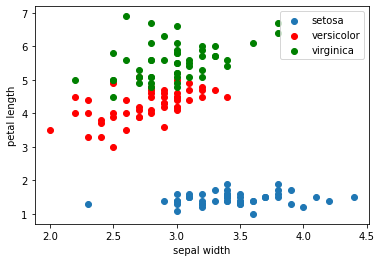

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

plt.xlabel('sepal width')
plt.ylabel('petal length')
plt.scatter(df0['sepal width (cm)'],df0['petal length (cm)'],label = 'setosa')
plt.scatter(df1['sepal width (cm)'],df1['petal length (cm)'] ,color = 'red',label = 'versicolor')
plt.scatter(df2['sepal width (cm)'],df2['petal length (cm)'] ,color = 'green',label='virginica')
plt.legend(loc = "best")

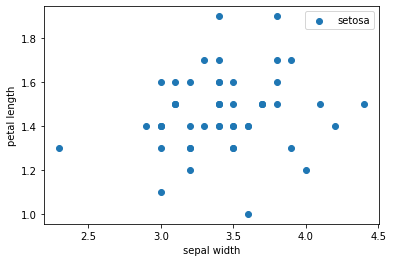

In [12]:
plt.scatter(df0['sepal width (cm)'],df0['petal length (cm)'],label = 'setosa')
plt.xlabel('sepal width')
plt.ylabel('petal length')
plt.legend()

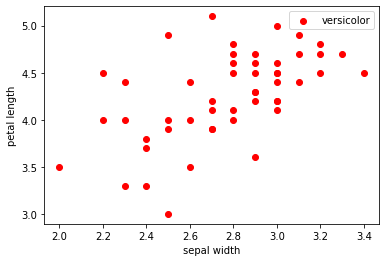

In [13]:
plt.scatter(df1['sepal width (cm)'],df1['petal length (cm)'] ,color = 'red',label = 'versicolor')
plt.xlabel('sepal width')
plt.ylabel('petal length')
plt.legend()

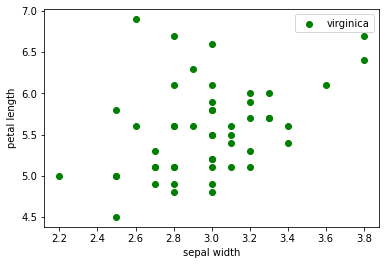

In [14]:
plt.scatter(df2['sepal width (cm)'],df2['petal length (cm)'] ,color = 'green',label = 'virginica')
plt.xlabel('sepal width')
plt.ylabel('petal length')
plt.legend()

In [15]:
from sklearn.model_selection import train_test_split
x = df.drop(['target','flower_name'],axis = 'columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y = df.target
x_train,t_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

SVC()

In [17]:
model.score(t_test,y_test)

0.9666666666666667

In [18]:
import os
if not os.path.exists('./saved_model'):
    os.mkdir('./saved_model')

In [19]:
#model has alreday given accuracy to 100 % no need to changed the saved model
import pickle
#with open('./saved_model/svm','wb') as f:
#    pickle.dump(model,f)

In [20]:
with open('./saved_model/svm','rb') as f:
    np = pickle.load(f)
iris.target_names[np.predict([[5.0,3.6,1.4,0.2]])[0]]

'setosa'